<a href="https://colab.research.google.com/github/rodrigorissettoterra/Analise-de-gorjetas/blob/main/An%C3%A1lise_de_vendas_de_casas_em_King_County_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de vendas de casas em King County - USA

##01 - Preparação do ambiente

###Importando bibliotecas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

###Importando a base de dados

In [41]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [42]:
#Apresentando as 5 primeiras linhas
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###Informações sobre a base de dados

In [43]:
#Informações gerais sobre a base de dados
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',df.shape[0])
print('O número de colunas é:',df.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',df.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 21613
O número de colunas é: 22

A quantidade de dados nulos na base de dados é de: 23


In [44]:
#Tipos de dados
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [45]:
#Descrevendo a base de dados com o viés estatístico
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##02 - Data Wrangling

Excluindo a coluna "id" e "Unnamed: 0".


In [46]:
df.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Pode-se ver valores ausentes nas colunas: "bedrooms" e "bathrooms"


In [47]:
print("Número de NaN da coluna bedrooms :", df['bedrooms'].isnull().sum())
print("Número de NaN da coluna bathrooms :", df['bathrooms'].isnull().sum())

Número de NaN da coluna bedrooms : 13
Número de NaN da coluna bathrooms : 10


Substituição dos valores ausentes pela média da coluna

In [48]:
mean_bedrooms=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean_bedrooms, inplace=True)

mean_bathrooms=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean_bathrooms, inplace=True)

#Verificando novamente
print("Número de NaN da coluna bedrooms :", df['bedrooms'].isnull().sum())
print("Número de NaN da coluna bathrooms :", df['bathrooms'].isnull().sum())

Número de NaN da coluna bedrooms : 0
Número de NaN da coluna bathrooms : 0


#03 - Análise exploratória de dados

##Contabilizando quantidades de casas e separando por andares

In [49]:
floor_vc = df.value_counts("floors")
floor_vc.to_frame()

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


##O fato do imóvel ter (ou não) vista para o mar aumenta a discrepância de preços?

[Text(0, 0.5, 'Preços (x 10.000)'),
 Text(0.5, 0, 'Imóvel possui ista para o mar?\n (<- Não)                       (Sim ->)')]

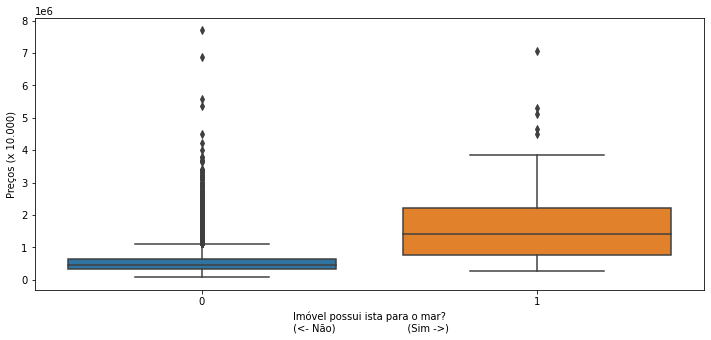

In [57]:
plt.figure(figsize=(12,5))
sns.boxplot(
    x="waterfront",
    y="price", 
    data=df).set(
        xlabel='Imóvel possui ista para o mar?\n (<- Não)                       (Sim ->)', 
        ylabel='Preços (x 10.000)')

##A área do imóvel está correlacionada com o preço?

[Text(0, 0.5, 'Preços (x 10.000)'), Text(0.5, 0, 'Área')]

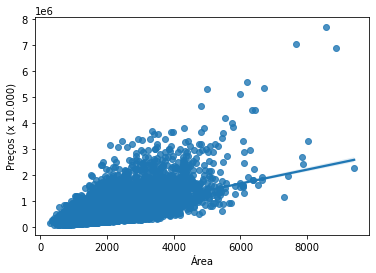

In [59]:
sns.regplot(x="sqft_above",y="price",data=df).set(xlabel='Área', ylabel='Preços (x 10.000)')

##Determinando a correlação entre todas as grandezas da base de dados com o preço

In [60]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

#04 - Desenvolvimento do modelo

Ajustando um modelo de regressão linear usando o recurso de longitude e calcular o R^2.

In [61]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Ajustando um modelo de regressão linear para prever o preço usando a área, em seguida, calculando o R^2.

In [66]:
X1 = df[['sqft_living']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1,Y1)
lm1.score(X1, Y1)

0.4928532179037931

Ajustando um modelo de regressão linear para prever o preço usando a lista de recursos:
*   "floors", 
*   "waterfront",
*   "lat",
*   "bedrooms" ,
*   "sqft_basement",
*   "view" ,
*   "bathrooms",
*   "sqft_living15",
*   "sqft_above",
*   "grade",
*   "sqft_living"


In [63]:
recursos = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [67]:
lm2 = LinearRegression()
lm2.fit(recursos,Y1)
lm2.score(recursos,Y1)

0.6576537175949295

Usando a lista acima para criar um objeto de pipeline para prever o preço, ajustar o objeto usando os recursos na lista 'recursos' e calculando o R^2. 

In [68]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Pipeline1 = Pipeline(Input)
Pipeline1.fit(recursos,Y1)
Pipeline1.score(recursos,Y1)

0.7513411741799744

#05 - Avaliação e refinamento do modelo

In [70]:
#Importando bibliotecas necessárias
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Dividinfo a base de dados em treino e teste

In [71]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Número de registros separados para o test:", x_test.shape[0])
print("Número de registros separados para o treino:",x_train.shape[0])

Número de registros separados para o test: 3242
Número de registros separados para o treino: 18371


Criando e ajustando um objeto de regressão Ridge usando os dados de treinamento, </br>
Definindo o parâmetro de regularização como 0,1 e </br>
Calculando o R^2 com os dados de teste.

In [72]:
#Importando biblioteca necessária
from sklearn.linear_model import Ridge

In [73]:
model = Ridge(alpha=0.1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6478759163939114

Executando uma transformação polinomial de segunda ordem nos dados de treinamento e nos dados de teste,</br>
Criando e ajustando um objeto de regressão Ridge usando os dados de treinamento,</br> Definindo o parâmetro de regularização como 0,1 e</br> Calculando o R^2 usando os dados de teste fornecidos.

In [74]:
pf = PolynomialFeatures(degree=2,include_bias=False)

x_train_poly2 = pf.fit_transform(x_train)
x_test_poly2 = pf.fit_transform(x_test)

model_poly2 = Ridge(alpha=0.1)
model_poly2.fit(x_train_poly2,y_train)
model_poly2.score(x_test_poly2,y_test)

0.7002744262309804